# EDA-Terrorism (GRIP Foundation)

In [26]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [27]:
import math
import warnings
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import plotly.offline as py
import plotly.graph_objs as go
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')


In [36]:
data_t = pd.read_csv("/content/drive/MyDrive/globalTerrorism.csv",encoding='ISO-8859-1')
columns  = list(data_t.columns)
columns

['eventid',
 'iyear',
 'imonth',
 'iday',
 'approxdate',
 'extended',
 'resolution',
 'country',
 'country_txt',
 'region',
 'region_txt',
 'provstate',
 'city',
 'latitude',
 'longitude',
 'specificity',
 'vicinity',
 'location',
 'summary',
 'crit1',
 'crit2',
 'crit3',
 'doubtterr',
 'alternative',
 'alternative_txt',
 'multiple',
 'success',
 'suicide',
 'attacktype1',
 'attacktype1_txt',
 'attacktype2',
 'attacktype2_txt',
 'attacktype3',
 'attacktype3_txt',
 'targtype1',
 'targtype1_txt',
 'targsubtype1',
 'targsubtype1_txt',
 'corp1',
 'target1',
 'natlty1',
 'natlty1_txt',
 'targtype2',
 'targtype2_txt',
 'targsubtype2',
 'targsubtype2_txt',
 'corp2',
 'target2',
 'natlty2',
 'natlty2_txt',
 'targtype3',
 'targtype3_txt',
 'targsubtype3',
 'targsubtype3_txt',
 'corp3',
 'target3',
 'natlty3',
 'natlty3_txt',
 'gname',
 'gsubname',
 'gname2',
 'gsubname2',
 'gname3',
 'gsubname3',
 'motive',
 'guncertain1',
 'guncertain2',
 'guncertain3',
 'individual',
 'nperps',
 'nperpcap',
 

I found these columns as relevant to the problem statement

In [37]:
selected_columns = ['iyear', 'imonth', 'iday', 'extended', 'country_txt', 'region_txt', 'city', 'multiple', 'success', 'suicide', 'attacktype1_txt', 'weaptype1_txt', 'nkill', 'ransom']
data_t = data_t[selected_columns]
data_t.head()

,iyear,imonth,iday,extended,country_txt,region_txt,city,multiple,success,suicide,attacktype1_txt,weaptype1_txt,nkill,ransom
0,1970,7,2,0,Dominican Republic,Central America & Caribbean,Santo Domingo,0.0,1.0,0.0,Assassination,Unknown,1.0,0.0
1,1970,0,0,0,Mexico,North America,Mexico city,0.0,1.0,0.0,Hostage Taking (Kidnapping),Unknown,0.0,1.0
2,1970,1,0,0,Philippines,Southeast Asia,Unknown,0.0,1.0,0.0,Assassination,Unknown,1.0,0.0
3,1970,1,0,0,Greece,Western Europe,Athens,0.0,1.0,0.0,Bombing/Explosion,Explosives,NaN,0.0
4,1970,1,0,0,Japan,East Asia,Fukouka,0.0,1.0,0.0,Facility/Infrastructure Attack,Incendiary,NaN,0.0


In [30]:
data_t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27672 entries, 0 to 27671
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   iyear            27672 non-null  int64  
 1   imonth           27672 non-null  int64  
 2   iday             27672 non-null  int64  
 3   extended         27672 non-null  int64  
 4   country_txt      27672 non-null  object 
 5   region_txt       27672 non-null  object 
 6   city             27671 non-null  object 
 7   multiple         27671 non-null  float64
 8   success          27671 non-null  float64
 9   suicide          27671 non-null  float64
 10  attacktype1_txt  27671 non-null  object 
 11  weaptype1_txt    27671 non-null  object 
 12  nkill            22454 non-null  float64
 13  ransom           27350 non-null  float64
dtypes: float64(5), int64(4), object(5)
memory usage: 3.0+ MB


Descriptive about the features selected

In [31]:
print("Country with the most attacks:",data_t['country_txt'].value_counts().idxmax())
print("City with the most attacks:",data_t['city'].value_counts().index[1]) #as first entry is 'unknown'
print("Region with the most attacks:",data_t['region_txt'].value_counts().idxmax())
print("Year with the most attacks:",data_t['iyear'].value_counts().idxmax())
print("Month with the most attacks:",data_t['imonth'].value_counts().idxmax())
print("Most Attack Types:",data_t['attacktype1_txt'].value_counts().idxmax())

Country with the most attacks: El Salvador
City with the most attacks: Belfast
Region with the most attacks: Western Europe
Year with the most attacks: 1984
Month with the most attacks: 5
Most Attack Types: Bombing/Explosion


## Data Visualization

Word Cloud for the countries columns

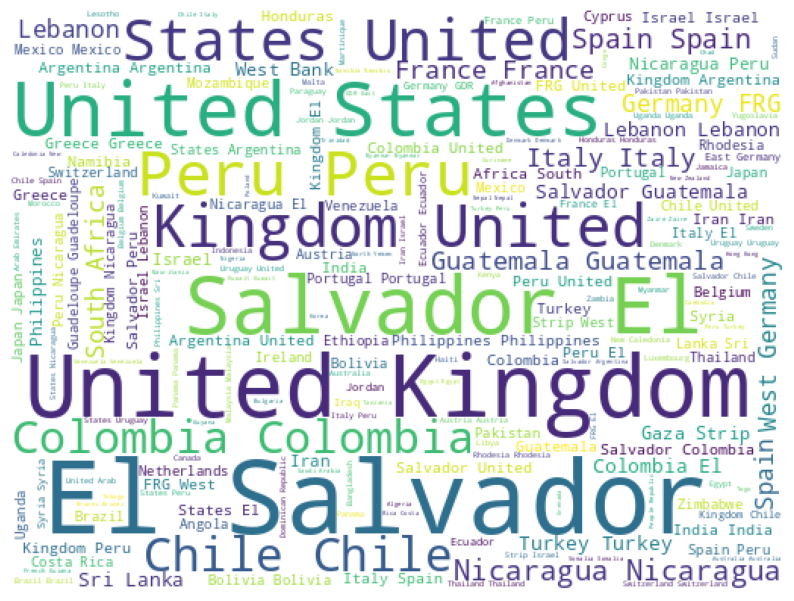

In [32]:
from wordcloud import WordCloud
from scipy import signal
cities = data_t.country_txt.dropna(False)
plt.subplots(figsize=(10,10))
wordcloud = WordCloud(background_color = 'white',
                     width = 512,
                     height = 384).generate(' '.join(cities))
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

In [33]:
data_t['iyear'].value_counts(dropna = False).sort_index()

1970     651
1971     471
1972     568
1973     473
1974     581
1975     740
1976     923
1977    1319
1978    1526
1979    2662
1980    2662
1981    2586
1982    2544
1983    2870
1984    3495
1985    2915
1986     685
1987       1
Name: iyear, dtype: int64

Number of terrorist activities each year


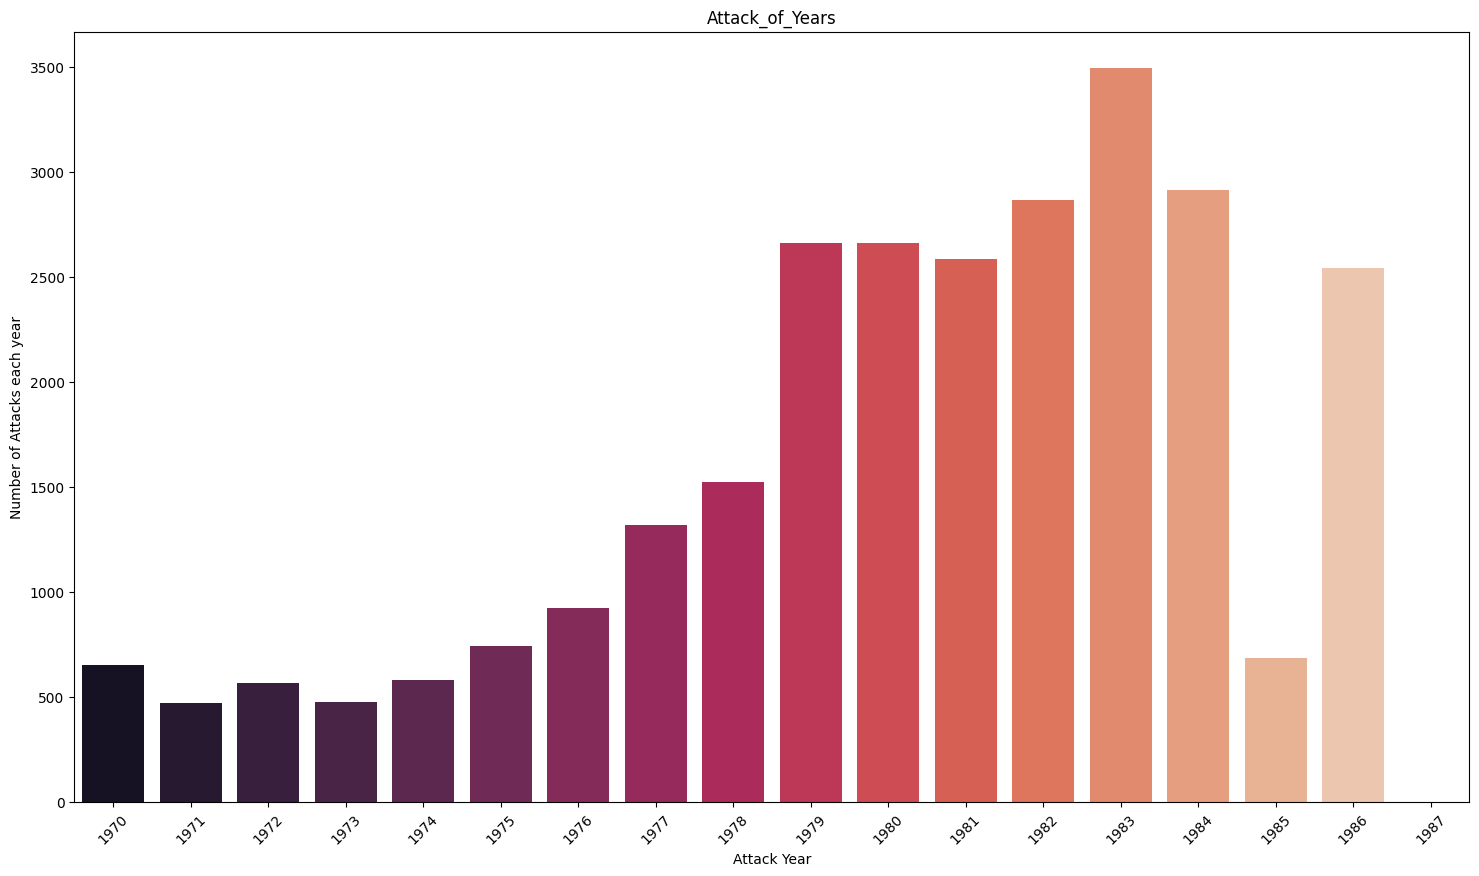

In [34]:
x_year = data_t['iyear'].unique()
y_count_years = data_t['iyear'].value_counts(dropna = False).sort_index()
plt.figure(figsize = (18,10))
sns.barplot(x = x_year,
           y = y_count_years,
           palette = 'rocket')
plt.xticks(rotation = 45)
plt.xlabel('Attack Year')
plt.ylabel('Number of Attacks each year')
plt.title('Attack_of_Years')
plt.show()

Terrorist activities by region for each year through area plot

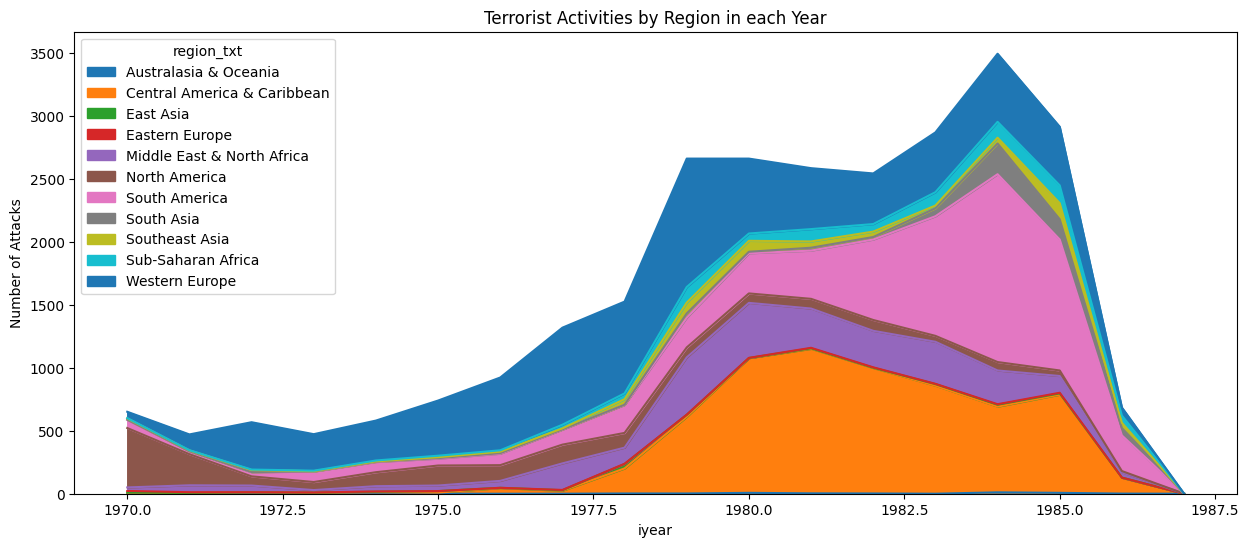

In [40]:
pd.crosstab(data_t.iyear, data_t.region_txt).plot(kind='area',figsize=(15,6))
plt.title('Terrorist Activities by Region in each Year')
plt.ylabel('Number of Attacks')
plt.show()


top countries affected by terror attacks

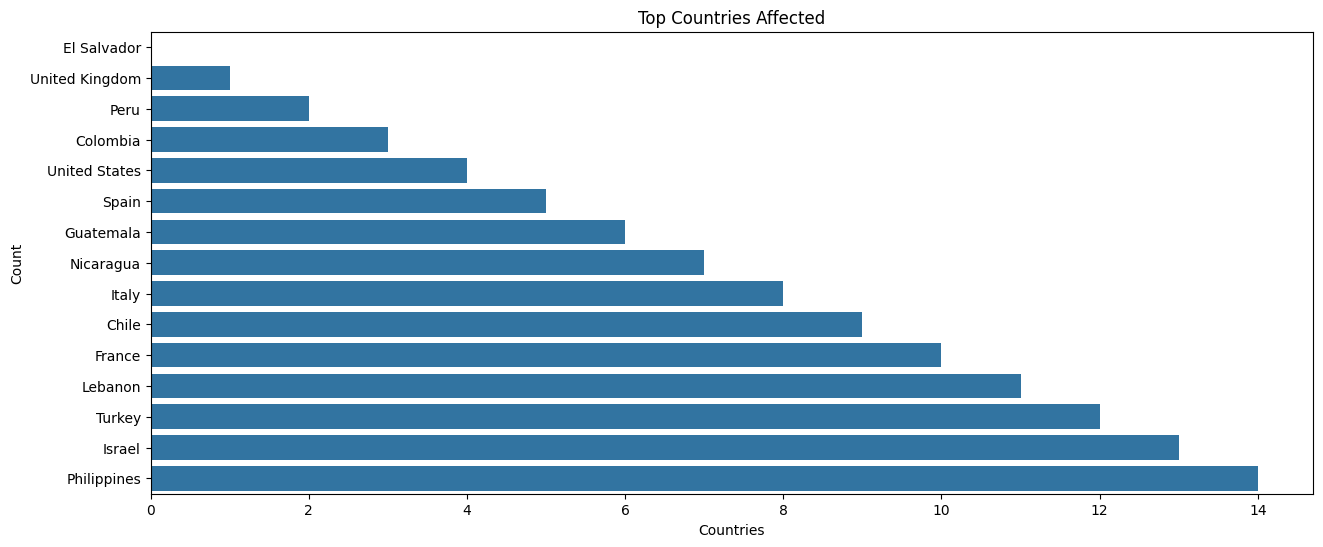

In [45]:
plt.subplots(figsize=(15,6))
sns.barplot(data_t['country_txt'].value_counts()[:15].index)
plt.title('Top Countries Affected')
plt.xlabel('Countries')
plt.ylabel('Count')
plt.show()

In [48]:
data_t.country_txt.value_counts()[:15]

El Salvador       3497
United Kingdom    2415
Peru              2231
Colombia          1862
United States     1851
Spain             1738
Guatemala         1419
Nicaragua         1344
Italy             1257
Chile             1124
France            1084
Lebanon            909
Turkey             618
Israel             465
Philippines        463
Name: country_txt, dtype: int64

Terrorist attacks is most commonly seen in australasia & oceanica:
El salvador and uk are geting attacked by terrorism the most

